# INFO 6205 – Program Structure and Algorithms Assignment 2 Solutions
## Name: Yanyan Chen
## NUID: 002799697
## Date: 10/8/2023
***Note: 1. some snippets of code are pseudo-code, for better explaining and answering questions, and don't really run. 2. All the tables and graphics are created by me and are all original!***

## **Q1:**
Use the Kruskal algorithm to find a minimum spanning tree for the following connected weighted graph:

Vertices: A, B, C, D, E, F

Edges and their weights:

(A, B) - 3

(A, C) - 1

(B, C) - 2

(B, D) - 5

(C, D) - 4

(C, E) - 6

(D, E) - 7

(E, F) - 8

(D, F) - 9


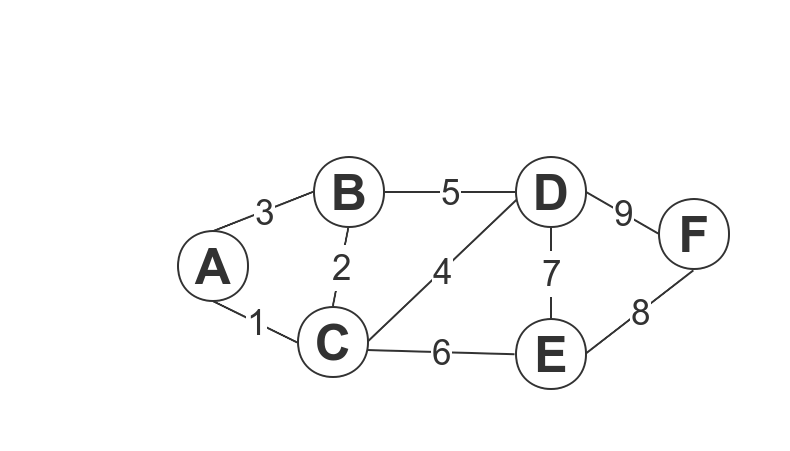

And analyze the time complexity of the algorithm

###**Answer:**
In order to better analyze the problem, let's first analyze the general pseudo-code of Kruskal's algorithm, as well as the pseudo-code that is tailored for this particular problem:

####Kruskal's Algorithm (**General Pseudo-code**):

In [ ]:
# This is pseudo-code for better explaining solution process

function Kruskal(graph):
    mst = {}   // Initialize the minimum spanning tree as an empty set
    edges = sortEdgesByWeight(graph.edges)  // Sort the edges by weight

    // Create a union-find data structure with each vertex as a separate set
    for each vertex v in graph.vertices:
        MakeSet(v)

    for each edge (u, v) in edges:
        if FindSet(u) != FindSet(v):   // The vertices aren't in the same set
            add edge (u, v) to mst
            Union(u, v)   // Merge the sets of u and v

    return mst


For the union-find operations (MakeSet, FindSet, and Union), we use a disjoint-set data structure.

####Kruskal's Algorithm (**Tailored Pseudo-code** for this specific problem):

In [ ]:
# This is pseudo-code for better explaining solution process

function KruskalForGivenGraph():
    mst = {}
    vertices = [A, B, C, D, E, F]
    edges = [(A, C, 1), (B, C, 2), (A, B, 3), (C, D, 4), (B, D, 5), (C, E, 6), (D, E, 7), (E, F, 8), (D, F, 9)]
    sortedEdges = sortByWeight(edges)  // Assuming this gives the edges in increasing weight

    for each vertex v in vertices:
        MakeSet(v)

    for each edge (u, v, w) in sortedEdges:
        if FindSet(u) != FindSet(v):
            add edge (u, v, w) to mst
            Union(u, v)

    return mst

When run KruskalForGivenGraph(), it should return:

[(A, C, 1), (B, C, 2), (C, D, 4), (C, E, 6), (E, F, 8)]



#### **Solution:**

**1. Sort all the edges in increasing order of their weight:**

  (A, C) - 1

  (B, C) - 2

  (A, B) - 3

  (C, D) - 4

  (B, D) - 5

  (C, E) - 6

  (D, E) - 7

  (E, F) - 8

  (D, F) - 9

**2. Pick the smallest edge:**

  (A, C) - 1. Since it doesn't form a cycle, add it to the MST.

**3. Pick the next smallest edge:**

  (B, C) - 2. This edge also doesn't form a cycle. Add it to the MST.

**4. Next:**

  (A, B) - 3. This edge forms a cycle with (A, C) and (B, C). So, skip it.

**5. Next:**

  (C, D) - 4. This edge is fine. Add it to the MST.

**6. Next:**

  (B, D) - 5. This edge forms a cycle. Skip it.

**7. Next:**

  (C, E) - 6. Add it to the MST.

**8. Next:**

  (D, E) - 7. This edge forms a cycle. Skip it.

**9. Next:**

  (E, F) - 8. Add it to the MST.

**10. At this point, we've connected all vertices and have our minimum spanning tree:**

  Edges in the MST:

  (A, C) - 1

  (B, C) - 2

  (C, D) - 4

  (C, E) - 6

  (E, F) - 8

The total weight for this MST is 1 + 2 + 4 + 6 + 8 = 21.


To solve the problem using Kruskal's algorithm, we'll also implement a disjoint set (union-find) structure to handle the cycle detection. Here's a Python solution for the question:

In [7]:
class DisjointSet:
    def __init__(self, vertices):
        self.parent = {}
        self.rank = {}
        for vertex in vertices:
            self.parent[vertex] = vertex
            self.rank[vertex] = 0

    def find(self, item):
        if self.parent[item] != item:
            self.parent[item] = self.find(self.parent[item])
        return self.parent[item]

    def union(self, x, y):
        rootX = self.find(x)
        rootY = self.find(y)
        if rootX != rootY:
            if self.rank[rootX] < self.rank[rootY]:
                self.parent[rootX] = rootY
            else:
                self.parent[rootY] = rootX
                if self.rank[rootX] == self.rank[rootY]:
                    self.rank[rootX] += 1

def kruskal(graph_vertices, graph_edges):
    ds = DisjointSet(graph_vertices)
    mst = []
    sorted_edges = sorted(graph_edges, key=lambda item: item[2])

    for edge in sorted_edges:
        vertex1, vertex2, weight = edge
        if ds.find(vertex1) != ds.find(vertex2):
            mst.append(edge)
            ds.union(vertex1, vertex2)

    return mst

# Define the graph
vertices = ['A', 'B', 'C', 'D', 'E', 'F']
edges = [
    ('A', 'B', 3),
    ('A', 'C', 1),
    ('B', 'C', 2),
    ('B', 'D', 5),
    ('C', 'D', 4),
    ('C', 'E', 6),
    ('D', 'E', 7),
    ('E', 'F', 8),
    ('D', 'F', 9)
]

# Find MST
mst = kruskal(vertices, edges)
print("Minimum Spanning Tree edges:", mst)

# Calculate the total weight
total_weight = sum(weight for _, _, weight in mst)
print("Total weight of MST:", total_weight)

Minimum Spanning Tree edges: [('A', 'C', 1), ('B', 'C', 2), ('C', 'D', 4), ('C', 'E', 6), ('E', 'F', 8)]
Total weight of MST: 21


This output represents the minimum spanning tree for the given weighted graph. And the total weight for this MST is 1 + 2 + 4 + 6 + 8 = 21.

## **Q2**:

Given the DAG below, which consists of vertices {A, B, C, D, E, F} and the following edges:

$ A -> B $

$ A -> C $

$ B -> D $

$ C -> D $

$ D -> E $

$ E -> F $

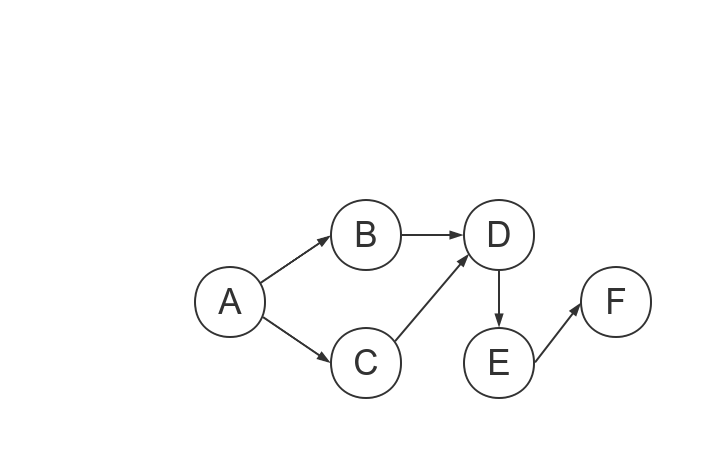

Answer the following:

1. Express the directed graph as:


*   An adjacency list
*   An adjacency matrix

2. Can the directed graph be topologically sorted? If so, produce a topological sort for the graph.

### **Answer:**

#### **1. Express the graph as::**

**i. Adjacency List**

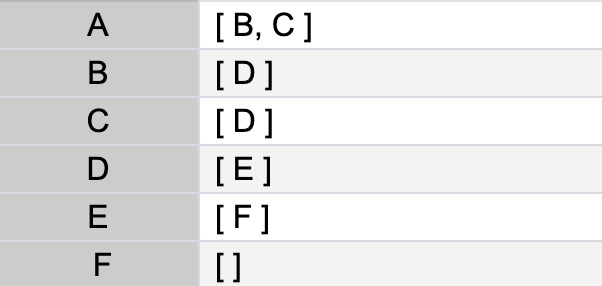

**ii. Adjacency Matrix**
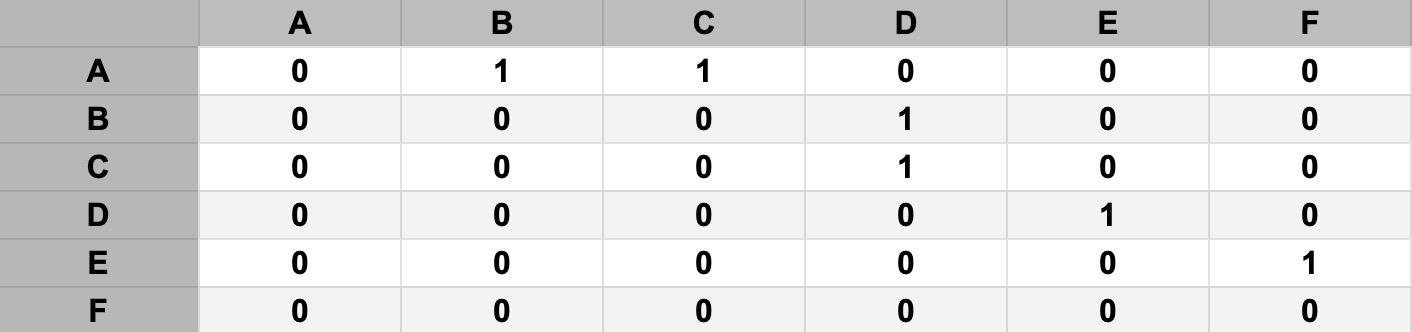

#### **B. Topological Sort:**

Yes, it can be topologically sorted.

We can achieve topological sorting using Depth-First Search (DFS).

**Pseudo-Code:**

In [ ]:
# This is pseudo-code for better explaining solution process

function topologicalSort(vertex, visited, stack):
    mark vertex as visited
    for each neighbor v of vertex:
        if v is not visited:
            topologicalSort(v, visited, stack)
    push vertex to stack

initialize an empty stack
initialize visited array with false for all vertices

for each vertex v:
    if v is not visited:
        topologicalSort(v, visited, stack)

print stack (this contains the topological sort)

Using the DFS algorithm:

1. Starting from A, it moves to B.

2. B moves to D.

3. D moves to E.

4. E moves to F.

5. After F, it backtracks to E, then D, then B and finally back to A.

6. Now, A moves to its next neighbor, C.

7. C also moves to D, but since D is already visited, it just backtracks.

Hence the order of insertion into the stack: F, E, D, B, C, A

Thus, a topological sort for the graph is: A, C, B, D, E, F.

Here's a runnable Python code for the problem, We'll represent vertices as: A(0), B(1), C(2), D(3), E(4), F(5):

In [4]:
from collections import defaultdict

class Graph:
    def __init__(self, vertices):
        self.V = vertices
        self.graph = defaultdict(list)

    def addEdge(self, u, v):
        self.graph[u].append(v)

    def topologicalSortUtil(self, v, visited, stack):
        visited[v] = True
        for i in self.graph[v]:
            if visited[i] == False:
                self.topologicalSortUtil(i, visited, stack)
        stack.insert(0, v)

    def topologicalSort(self):
        visited = [False] * self.V
        stack = []

        for i in range(self.V):
            if visited[i] == False:
                self.topologicalSortUtil(i, visited, stack)
        return stack

# Expressing vertices as numbers for simplicity.
# A=0, B=1, C=2, D=3, E=4, F=5

# Create the graph given in problem statement
g = Graph(6)
g.addEdge(0, 1)
g.addEdge(0, 2)
g.addEdge(1, 3)
g.addEdge(2, 3)
g.addEdge(3, 4)
g.addEdge(4, 5)

print("Topological Sort:")
print(g.topologicalSort())

Topological Sort:
[0, 2, 1, 3, 4, 5]


The code produces the correct topological sort for the given graph. Again, it's worth noting that topological sort can have multiple valid outputs depending on the sequence of exploration of vertices.

## **Q3:**

For each of the following recurrences, give an expression for the runtime $T(n)$ if the recurrence can be solved with the Master Theorem. Otherwise, indicate that the Master Theorem does not apply.

1. $T(n)=4T(n/2)+n^2$

2. $T(n)=2T(n/4)+ \sqrt{n}$

3. $T(n)=5T(n/5)+ nlogn $

4. $T(n)=3T(n/2)+ n^{1.5} $

5. $T(n)=\frac{1}{3}nT(n/2)+ n^2 $

###**Answer:**

Recall the Master Theorem:

For a recurrence of the form:

$T(n)=aT(n/b)+f(n)$

Where:

a ≥ 1, b > 1, and f(n) is a given function.

There are three cases of the Master theorem:

1. If $f(n)=O(n^{log_b{a−ϵ}})$ for some $ϵ>0$, then $T(n)=Θ(n^{log_b{a}})$.

2. If $f(n)=Θ(n^{log_b{a}})$, then $T(n)=Θ(n^{log_b{a}}logn).

3. If $f(n)=Ω(n^{log_b{a+ϵ}})$ for some $ϵ>0$ and $af(n/b)≤kf(n)$ for some $k < 1$ and sufficiently large n, then $T(n)=Θ(f(n))$.

Now, solving each recurrence:

1. $T(n)=4T(n/2)+n^2$

  a = 4, b = 2, $f(n)=n^2$

  $n^{log_b{a}}=n^2$

  This falls under Case 2. So, $T(n)=Θ(n^2logn)$.

2. $T(n)=2T(n/4)+ \sqrt{n}$

  a = 2, b = 4, $f(n)= \sqrt{n}$

  $n^{log_b{a}}=n^{0.5}$

  This falls under Case 2. So, $T(n)=Θ(\sqrt{n}logn)$.

3. $T(n)=5T(n/5)+nlogn$

  a = 5, b = 5, $f(n)=nlogn$

  $n^{log_b{a}}=n$

  This doesn't fit cleanly into any of the Master Theorem cases. The Master Theorem does not apply.

4. $T(n)=3T(n/2)+n^{1.5}$

  a = 3, b = 2, $f(n)=n^{1.5}$

  $n^{log_b{a}}=n^{log_2{3}}$

  Since $n^{log_2{3}}$ is less than $n^{1.5}$, this falls under Case 3. So, $T(n)=Θ(n^{1.5})$.

5. $T(n)= \frac{1}{3}nT(n/2)+n^2$

  The form of the recurrence doesn't match the Master Theorem's requirements because of the term $\frac{1}{3}nT(n/2)$. The Master Theorem does not apply.

## **Q4:**

Given the weights and values of the six items in the table below, select a subset of items with the maximum combined value that will fit in a knapsack with a weight limit, $W$, of 10. Use dynamic programming.

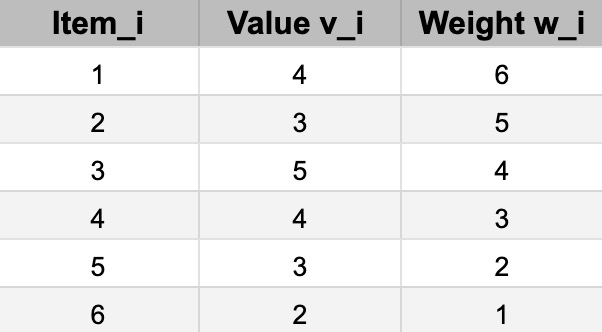

Capacity of knapsack $W = 10$

###**Answer:**

This is a classic problem in computer science known as the Knapsack problem. Let's will solve it using dynamic programming, which breaks down the problem into simpler sub-problems.

To explain the process, consider the following dynamic programming approach:

1. Let's denote $K[i][w]$ as the maximum value that can be obtained with the first $i$ items and a weight constraint $w$. So, $K[n][W]$ will give us the solution we seek, where $n$ is the total number of items and $W$ is the weight limit.

2. We will construct the $K$ table row by row. When considering the i-th item and weight w:

* If $w_i > w$, the i-th item cannot be included, and therefore $K[i][w] = K[i-1][w]$.
* Otherwise, we have two choices:
  * Either to include the i-th item: $v_i + K[i-1][w-w_i]$
  * Or to exclude it: $K[i-1][w]$.

The optimal choice is the maximum of these two.

Let's describe this process using **pseudo-code**:

In [ ]:
# This is pseudo-code for better explaining solution process

n = number of items
W = knapsack capacity

Initialize dp table of size (n+1) x (W+1) as 0

for i from 1 to n:
    for w from 1 to W:
        if w_i <= w:
            dp[i][w] = max(dp[i-1][w], dp[i-1][w-w_i] + v_i)
        else:
            dp[i][w] = dp[i-1][w]


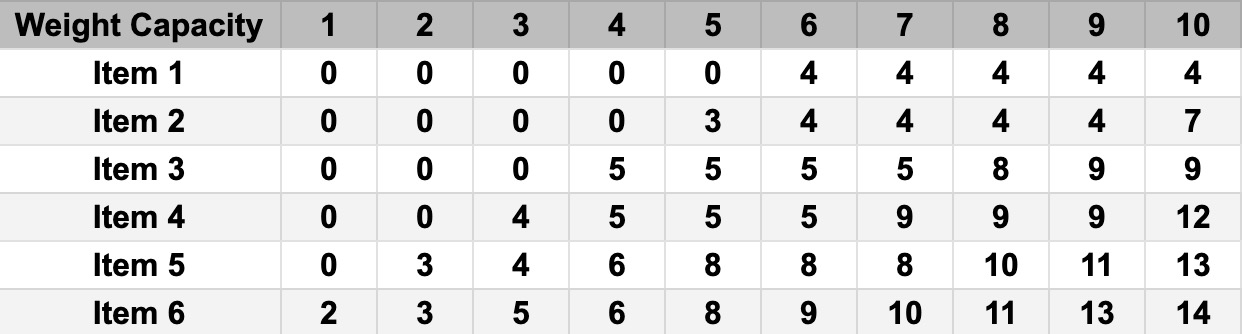

So, the maximum combined value that will fit in a knapsack with a weight limit of 10 is 14.

For this weight, the selected items are:

Item 6 (Value 2, Weight 1)

Item 5 (Value 3, Weight 2)

Item 4 (Value 4, Weight 3)

Item 3 (Value 5, Weight 4)

The total weight is 1 + 2 + 3 + 4 = 10, and the total value is 2 + 3 + 4 + 5 = 14, which matches our DP table's result.

Here's a runnable Python code for the problem using dynamic programming:

In [11]:
def knapsack(values, weights, W):
    n = len(values)
    # Initialize the K table with zeros
    K = [[0 for _ in range(W + 1)] for _ in range(n + 1)]

    # Populate the K table
    for i in range(1, n + 1):
        for w in range(1, W + 1):
            if weights[i-1] <= w:
                K[i][w] = max(values[i-1] + K[i-1][w-weights[i-1]], K[i-1][w])
            else:
                K[i][w] = K[i-1][w]

    return K[n][W], K

def get_selected_items(K, weights, W):
    n = len(K) - 1
    w = W
    selected_items = []

    while n > 0 and w > 0:
        if K[n][w] != K[n-1][w]:
            selected_items.append(n)  # item n is in the knapsack
            w -= weights[n-1]
        n -= 1

    selected_items.reverse()
    return selected_items

values = [4, 3, 5, 4, 3, 2]
weights = [6, 5, 4, 3, 2, 1]
W = 10

max_value, K = knapsack(values, weights, W)
selected_items = get_selected_items(K, weights, W)

print(f"Maximum value that can be obtained: {max_value}")
print(f"Items selected: {selected_items}")


Maximum value that can be obtained: 14
Items selected: [3, 4, 5, 6]


The subset of items that will fit in a knapsack with a weight limit of 11 from these 5 items is the subset {1, 3, 5}, with a total value of 14

## **Q5:**

**The Ever-expanding Story**

Consider a collection of stories where each chapter includes all content from the previous chapters with an additional paragraph added. A mythical story about the origins of the world, "Chronicles of Beginnings", follows this pattern. For instance, in Chapter 5, you'd read about the emergence of mountains, and then, recapitulating paragraphs from the previous chapters, also read about the creation of seas, the birth of skies, the dance of the winds, and the void before time.

Given the length of the book and understanding that the tales tend to be long even with short chapters, how can we efficiently store such a story? Let's put forth a challenge:

Suppose every paragraph has a length bounded by a constant $p$. If the entire book is $m$ paragraphs long when read from start to end, show how to store such a book using space $g(m)$, where function $g(m)$ grows as slowly as possible.

###**Answer:**

**Solution:**

1. **Observe the Structure:**

  The structure of these stories, as mentioned, has a cumulative nature. Each chapter is a superset of the previous one. Therefore, storing the story conventionally would be highly repetitive and space-consuming.

2. **Store Incrementally:**

  We only need to store the new paragraph added with every chapter. This way, the entire story can be regenerated by sequentially reading and combining the paragraphs.

3. **Constructing a Table:**

  To better understand, let's visualize using a table for the first few chapters:

  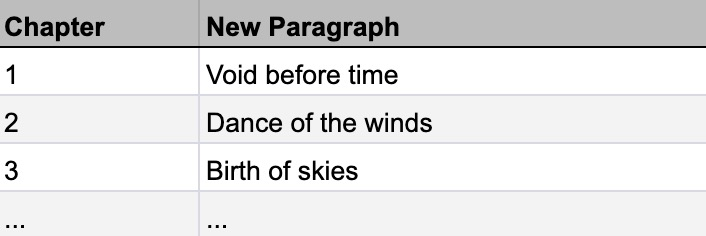

  4. **Space Analysis:**

  The total number of paragraphs if we were to read the story till chapter $k$ would be:

  $ 1 + 2 + 3 + ... + k= \frac{k(k+1)}{2} $

  5. **Pseudo-code for Storing:**


In [ ]:
# This is pseudo-code for better explaining solution process

function storeStory(m):
    chapter_paragraphs = []
    for i from 1 to sqrt(2m):
        chapter_paragraphs.append(getNewParagraph(i))
    return chapter_paragraphs

6. **Pseudo-code for Retrieving:**

In [ ]:
# This is pseudo-code for better explaining solution process

function retrieveStory(m):
    story = ""
    for i from 1 to sqrt(2m):
        for j from 1 to i:
            story += chapter_paragraphs[j]
    return story

  In the above code, 'getNewParagraph(i)' fetches the new paragraph added in chapter $i$.

7. **Concluding the Space Requirement:**

  The space function $g(m)$ would roughly be proportional to the number of unique paragraphs, which is $O(\sqrt{2m})=O(\sqrt{m})$. Thus, $g(m)=O(\sqrt{m})$.

So, using this approach, a story that's $m$ paragraphs long when read traditionally can be stored using space growing as $O(\sqrt{m})$.


Here's a runnable Python code for the problem. It implements both the storage and retrieval functions for this problem:

Firstly, we assume a function 'getNewParagraph(chapter_number)' which returns the new paragraph for the given chapter. For simplicity, let's just simulate this function to return some dummy text based on the chapter number.

In [1]:
import math

def getNewParagraph(chapter_number):
    """Dummy function to simulate retrieving a new paragraph for a given chapter."""
    return f"Paragraph of Chapter {chapter_number}"

def storeStory(m):
    """Store the paragraphs of the story up to m cumulative paragraphs."""
    max_chapter = int(math.sqrt(2*m))
    chapter_paragraphs = []
    for i in range(1, max_chapter + 1):
        chapter_paragraphs.append(getNewParagraph(i))
    return chapter_paragraphs

def retrieveStory(chapter_paragraphs):
    """Retrieve the story based on stored paragraphs."""
    story = ""
    for i in range(len(chapter_paragraphs)):
        for j in range(i+1):  # It includes the paragraphs up to the current chapter
            story += chapter_paragraphs[j] + "\n"
    return story

# Let's test for a story with 10 cumulative paragraphs
m = 10
stored_paragraphs = storeStory(m)
print("Stored Paragraphs:")
print(stored_paragraphs)
print("\nRetrieved Story:")
print(retrieveStory(stored_paragraphs))


Stored Paragraphs:
['Paragraph of Chapter 1', 'Paragraph of Chapter 2', 'Paragraph of Chapter 3', 'Paragraph of Chapter 4']

Retrieved Story:
Paragraph of Chapter 1
Paragraph of Chapter 1
Paragraph of Chapter 2
Paragraph of Chapter 1
Paragraph of Chapter 2
Paragraph of Chapter 3
Paragraph of Chapter 1
Paragraph of Chapter 2
Paragraph of Chapter 3
Paragraph of Chapter 4



This code simulates storing and retrieving the story for a given number of cumulative paragraphs. In our example, we test it for 'm = 10'. The 'storeStory' function saves only the new paragraphs, while 'retrieveStory' regenerates the entire story from these saved paragraphs.

## **Q6:**

A binary tree is a rooted tree in which each node has at most two children. Prove by induction that for any binary tree, its preorder and inorder traversals are sufficient to uniquely determine the tree.

###**Answer:**

**Base Case:**

  For a binary tree with one node $n=1$:

* The preorder is [root], and the inorder is also [root].

  There is only one way this tree can be, so it's uniquely determined.

**Induction Hypothesis:**

Assume that for all binary trees of size $k$ (where $k$ is any positive integer), the tree can be uniquely determined by its preorder and inorder traversals.

**Induction Step:**

Consider a binary tree of size $k+1$.

* Let the preorder be P and the inorder be I.

From the definition of the preorder traversal:

* The first node in P is the root of the tree.

Using the root from P, split the inorder sequence I into two parts:

* All nodes to the left of the root in I form the inorder sequence of the left subtree.

* All nodes to the right of the root in I form the inorder sequence of the right subtree.

Based on the inorder split, we can determine the number of nodes in the left and right subtrees. This allows us to similarly split the preorder sequence (after the root) into two parts:

* The first part corresponds to the preorder sequence of the left subtree.

* The second part corresponds to the preorder sequence of the right subtree.

Now, by our induction hypothesis:

* The left subtree can be uniquely determined by its preorder and inorder sequences since it has at most $k$ nodes.

* Similarly, the right subtree can be uniquely determined by its preorder and inorder sequences since it also has at most $k$ nodes.

Thus, the whole tree can be uniquely determined by its preorder and inorder sequences.

Therefore, by the principle of mathematical induction, a binary tree can be uniquely determined by its preorder and inorder traversals for all sizes of binary trees.

Let's illustrate this with a concrete example

To reconstruct a binary tree from its preorder and inorder traversals, we can use the following recursive approach:

1. The first node in the preorder traversal will be the root.
2. Using the root, we can partition the inorder traversal into two parts: the left subtree and the right subtree.
3. Recur for the left and right subtrees using the respective sections of the preorder and inorder lists.

Here's the Python code for this:

In [10]:
class TreeNode:
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None

def buildTree(preorder, inorder):
    if not preorder or not inorder:
        return None

    # The first node in preorder is the root
    root = TreeNode(preorder[0])

    # Find the root in inorder to determine the boundary for left and right subtree
    inorder_index = inorder.index(preorder[0])

    # Recursively build left and right subtree
    # For preorder, skip the first element as we have already used it as root
    root.left = buildTree(preorder[1:1+inorder_index], inorder[:inorder_index])
    root.right = buildTree(preorder[1+inorder_index:], inorder[inorder_index+1:])

    return root

# Helper function to print inorder of the tree for verification
def printInorder(node):
    if node:
        printInorder(node.left)
        print(node.val, end=' ')
        printInorder(node.right)

# Example
preorder = [3,9,20,15,7]
inorder = [9,3,15,20,7]

root = buildTree(preorder, inorder)
printInorder(root)  # Expected output: 9 3 15 20 7


9 3 15 20 7 

The output verifies that the reconstructed tree is correct as per the given inorder traversal.

## **Q7:**

Your friends have now ventured into the world of music playlists, where songs are queued in a sequence based on user preferences. A specific song sequence, when played, gives a certain mood or theme to the listener. Your friends want to check if their preferred song sequence appears in the larger playlist, even if there are other songs in between.

Given a playlist sequence $S$ of length $n$ and a preferred song sequence $S′$ of length $m$, you have to determine if $S′$ is a subsequence of $S$.

Example:

Given the playlist:

$S = [SongA, SongB, SongC, SongD, SongA, SongE, SongC, SongF]$

And the preferred sequence:

$S′ = [SongA, SongC, SongA]$

We see that $S′$ is indeed a subsequence of $S$ as the songs appear in the order:

SongA → SongC → SongA.

###**Answer:**

**Solution:**

We can solve this using two pointers technique similar to the earlier problem.

**Pseudo-code:**

In [ ]:
# This is pseudo-code for better explaining solution process

initialize i = 0, j = 0

while i < m and j < n:
    if S'[i] == S[j]:
        increment i
    increment j

if i == m:
    return True
else:
    return False


**Table Explanation:**

Consider the given playlist $S$ and preferred sequence $S′$ from the example:

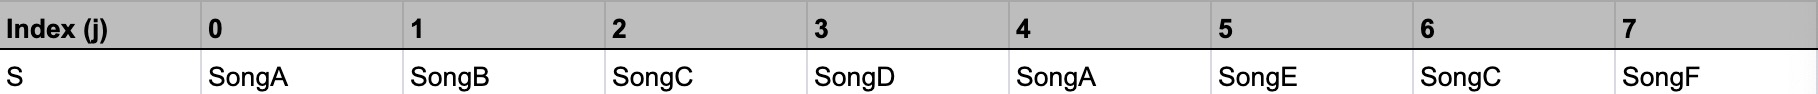

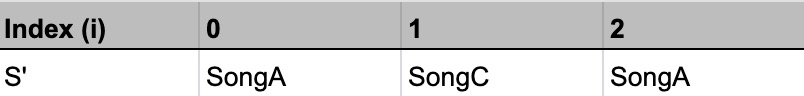

Start with both i and j at 0. Since S'[i] (SongA) is the same as S[j] (SongA), increment both i and j.

Next, S[j] is SongB which doesn't match with S'[i] (SongC). Increment only j.

Now, S[j] is SongC which matches with S'[i] (SongC). Increment both i and j.

Proceed in the same manner until i equals m or the end of the sequences. If i equals m by the end, then S' is a subsequence of S.

In this example, you would find that
S′ is indeed a subsequence of S.

As we traverse, our table will look like this:

**Table Progress:**

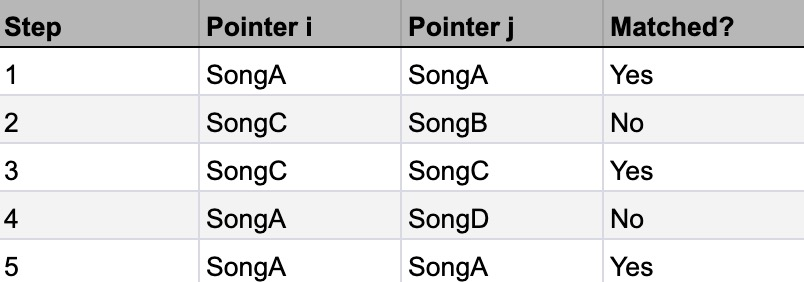

By the end of the traversal, if the pointer $i$ has reached the end of sequence $S′$, then $S′$ is a subsequence of $S$.

In this example, by the end, our $i$ pointer has traversed all of $S′$, so we can conclude that $S′$ is indeed a subsequence of $S$.

The given algorithm and traversal method will solve the problem in $O(m+n)$ time, as for each element in $S′$, we might traverse all the elements in $S$ (in the worst-case scenario). This makes the solution efficient for large playlists and song sequences.

Here's a Python function to determine if S' is a subsequence of S:

The function is_subsequence takes in the two sequences s_prime and s and returns True if s_prime is a subsequence of s, otherwise it returns False. In the provided example, it will return True as the sequence s_prime is a subsequence of s.

In [11]:
def is_subsequence(s_prime, s):
    i, j = 0, 0
    m, n = len(s_prime), len(s)

    while i < m and j < n:
        if s_prime[i] == s[j]:
            i += 1
        j += 1

    return i == m

# Example:
s = ["SongA", "SongB", "SongC", "SongD", "SongA", "SongE", "SongC", "SongF"]
s_prime = ["SongA", "SongC", "SongA"]

print(is_subsequence(s_prime, s))  # This will print True


True


The output being "True" for the provided example does indicate that the sequence s_prime is a subsequence of s based on the function's logic.

## **Q8:**

Determine the shortest path from node X to node Z using Breadth-First Search (BFS) in a directed cyclic graph provided below. Detail the steps of your approach.

**Graph Structure (as an adjacency list):**

X: [Y, V]

Y: [Z, V]

V: [X, W]

W: [Z]

Z: []


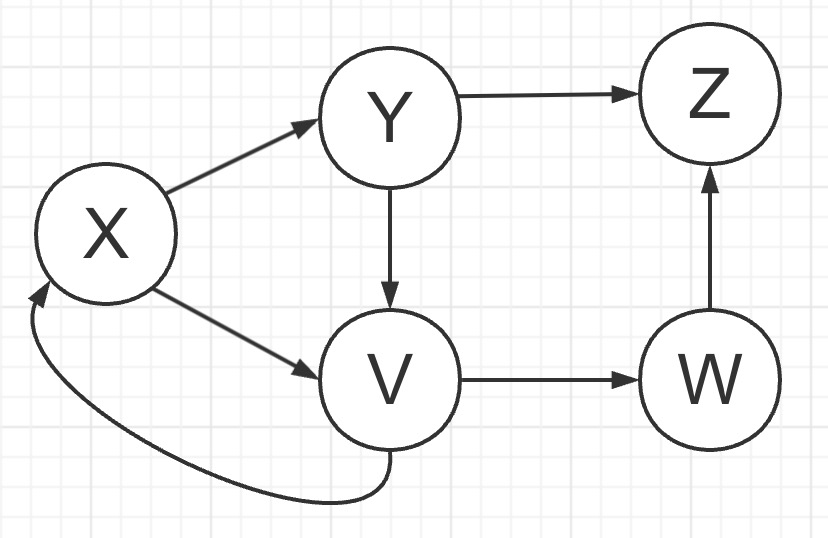

###**Answer:**

**Solution using BFS:**

Breadth-First Search (BFS) is a strategy for searching in a graph when a shortest path is needed. It starts at the root (selecting some arbitrary node as the root in the case of a graph) and explores the neighbor nodes at the present depth prior to moving on to nodes at the next depth level.

**Table of Steps:**

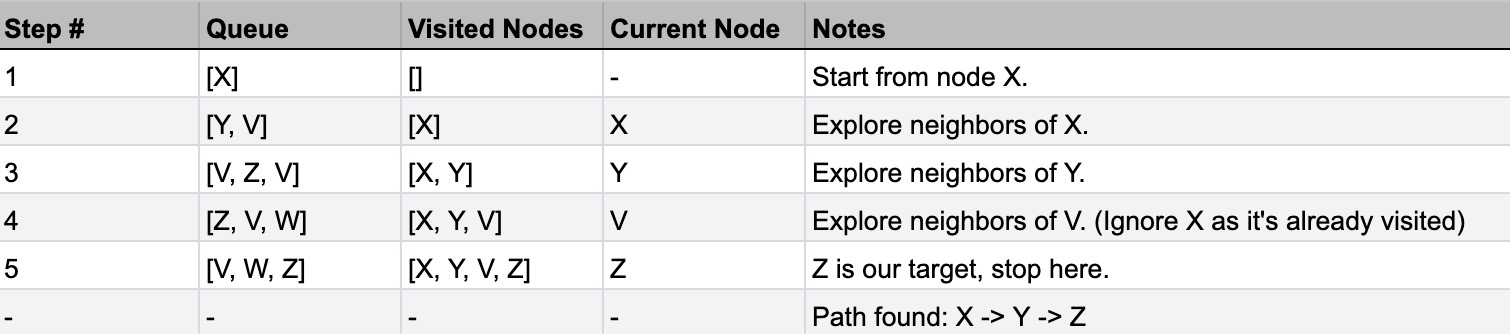

**Pseudo-code** for BFS to find the shortest path:

In [ ]:
# This is pseudo-code for better explaining solution process

function BFS(graph, startNode, targetNode):
    queue := empty queue
    visited := empty set
    path := empty list

    queue.enqueue(startNode)

    while queue is not empty:
        currentNode := queue.dequeue()
        if currentNode is not visited:
            visited.add(currentNode)
            path.append(currentNode)

            if currentNode == targetNode:
                return path

            for each neighbor in graph[currentNode]:
                if neighbor is not visited:
                    queue.enqueue(neighbor)

    return None  // No path found

graph = {
    "X": ["Y", "V"],
    "Y": ["Z", "V"],
    "V": ["X", "W"],
    "W": ["Z"],
    "Z": []
}
path = BFS(graph, "X", "Z")
print(path)  // Expected Output: ["X", "Y", "Z"]

This pseudo-code will return the shortest path from X to Z using BFS on the provided directed cyclic graph.

Let's write a Python implementation to find the shortest path from node X to node Z using BFS.

This code uses a BFS approach, where it keeps track of the path leading to each node in the queue. When it finds the target node, it returns the associated path. If no path is found, it will return None.

In [12]:
from collections import deque

def BFS_shortest_path(graph, start, target):
    queue = deque([(start, [start])])  # Each element in the queue is a tuple (current_node, path_so_far)
    visited = set()

    while queue:
        current_node, path = queue.popleft()

        if current_node == target:
            return path

        if current_node not in visited:
            visited.add(current_node)

            for neighbor in graph[current_node]:
                if neighbor not in visited:
                    queue.append((neighbor, path + [neighbor]))

    return None  # No path found

graph = {
    "X": ["Y", "V"],
    "Y": ["Z", "V"],
    "V": ["X", "W"],
    "W": ["Z"],
    "Z": []
}

path = BFS_shortest_path(graph, "X", "Z")
print(path)  # Expected Output: ['X', 'Y', 'Z']


['X', 'Y', 'Z']


This code returnS the shortest path from X to Z using BFS, which is ['X', 'Y', 'Z'].

## **Q9:**

Given the following weighted connected graph with 5 vertices (A, B, C, D, and E) and the associated weighted edges, use Prim's algorithm to determine its minimum spanning tree:

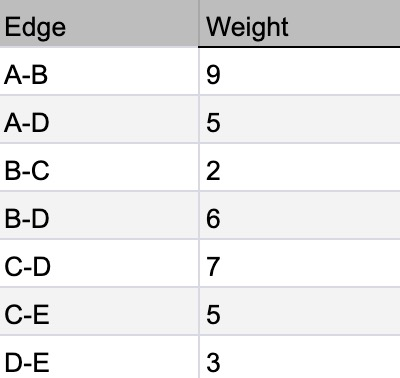



###**Answer:**

**Pseudo-Code for Prim's Algorithm:**

In [ ]:
# This is pseudo-code for better explaining solution process

function PrimsAlgorithm(graph):
    initialize an empty set MST
    choose an arbitrary vertex v from graph
    add v to the set of visited vertices

    while visited vertices < total number of vertices in graph:
        choose the edge (u, v) with the smallest weight such that u is visited and v is not visited
        add edge (u, v) to MST
        mark vertex v as visited

    return MST

**Steps:**

1. **Start with vertex A:** 'A' is our starting vertex.

2. **Edge with smallest weight from A:** **'A-D'** with weight 5. Add this to our tree.

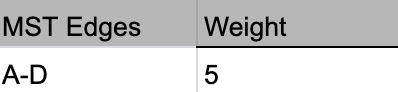

Visited vertices: A, D

3. **Next edge considering A and D:** D-E with weight 3.

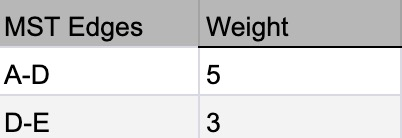

Visited vertices: A, D, E

4. **Considering vertices A, D, and E:** C-E with weight 5.

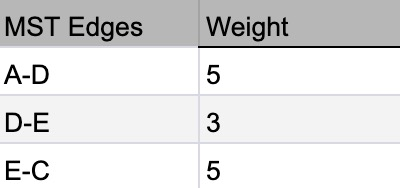

Visited vertices: A, D, E, C

5. **For vertices A, D, E, and C:** B-C with weight 2.

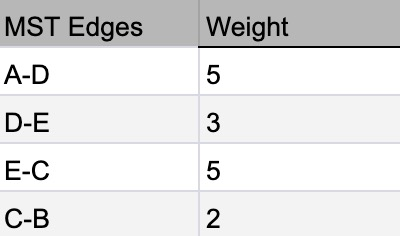

Visited vertices: A, D, E, C, B

With all vertices visited, we conclude here.

**Final Minimum Spanning Tree:**

Edges included are A-D, D-E, C-E, and B-C with a total weight of: 5 + 3 + 5 + 2 = 15.


In [13]:
import heapq

def prims_algorithm(graph, start_vertex):
    mst = set()
    visited = set([start_vertex])
    edges = [
        (cost, start_vertex, to)
        for to, cost in graph[start_vertex].items()
    ]
    heapq.heapify(edges)

    while edges:
        cost, frm, to = heapq.heappop(edges)
        if to not in visited:
            visited.add(to)
            mst.add((frm, to))
            for to_next, cost2 in graph[to].items():
                if to_next not in visited:
                    heapq.heappush(edges, (cost2, to, to_next))

    return mst

# Graph representation: dictionary of dictionaries
graph = {
    'A': {'B': 9, 'D': 5},
    'B': {'A': 9, 'C': 2, 'D': 6},
    'C': {'B': 2, 'D': 7, 'E': 5},
    'D': {'A': 5, 'B': 6, 'C': 7, 'E': 3},
    'E': {'C': 5, 'D': 3}
}

mst = prims_algorithm(graph, 'A')
print("Edges in the Minimum Spanning Tree:", mst)
total_weight = sum(graph[edge[0]][edge[1]] for edge in mst)
print("Total weight:", total_weight)


Edges in the Minimum Spanning Tree: {('A', 'D'), ('D', 'E'), ('E', 'C'), ('C', 'B')}
Total weight: 15


## **Q10:**

Given the seven intervals below, and their associated values; select a subset of non-overlapping intervals with the maximum combined value. Use dynamic programming to solve. (Note that the timeline start from 1)

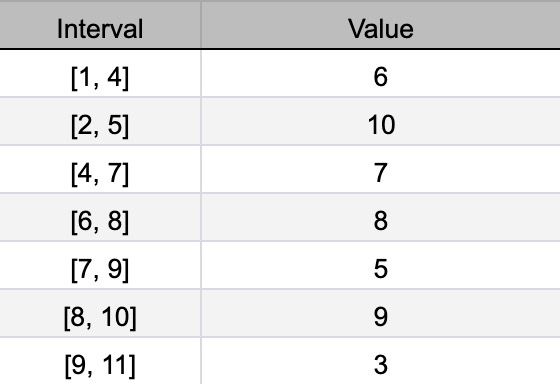

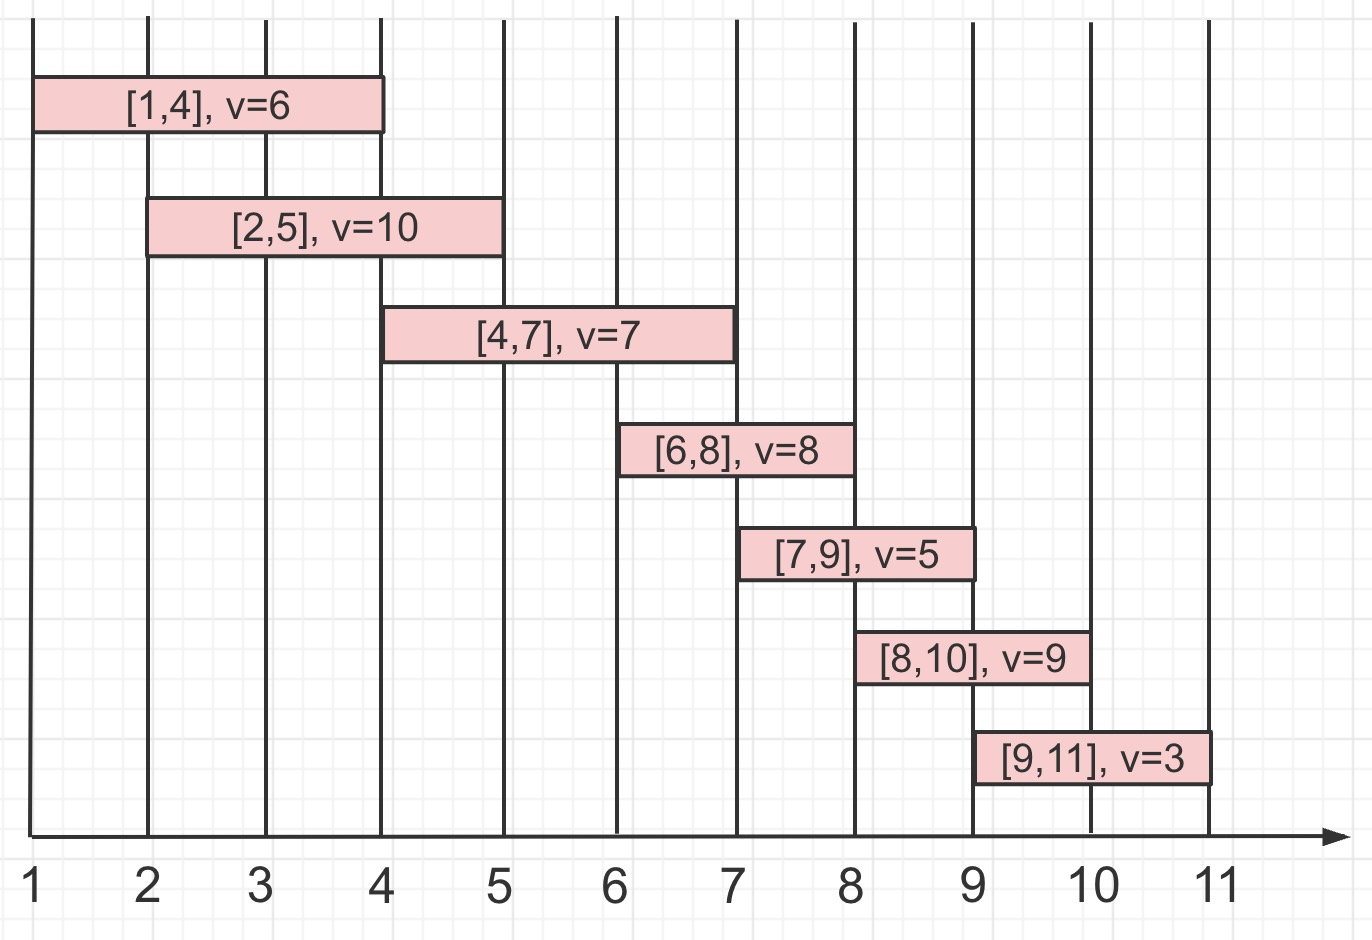

###**Answer:**

1. **Sort the intervals by their end times.**

2. **Find the previous non-overlapping interval for each interval.**
  
  To do this, for each interval i, check all previous intervals and find the one that ends right before i starts.

  For example, for interval [7, 9], the previous non-overlapping interval is [4, 7].

3. **Use dynamic programming to find the solution.**

  Let dp[i] represent the maximum combined value using intervals up to i.

  The recurrence relation will be:
  
  $ dp[i]=max(value[i]+dp[previous[i]],dp[i−1])$

  where '$previous[i]$' gives the index of the last non-overlapping interval for i.

4. **Pseudo-code:**

In [ ]:
# This is pseudo-code for better explaining solution process

// Step 1: Sort intervals by end times
sort(intervals by end time)

// Step 2: Find previous non-overlapping interval for each interval
for i from 1 to n:
    previous[i] = 0
    for j from i-1 down to 1:
        if intervals[j].end <= intervals[i].start:
            previous[i] = j
            break

// Step 3: Dynamic Programming
dp[0] = 0
for i from 1 to n:
    dp[i] = max(intervals[i].value + dp[previous[i]], dp[i-1])

// Result
The answer will be dp[n]

5. Solution for the question:

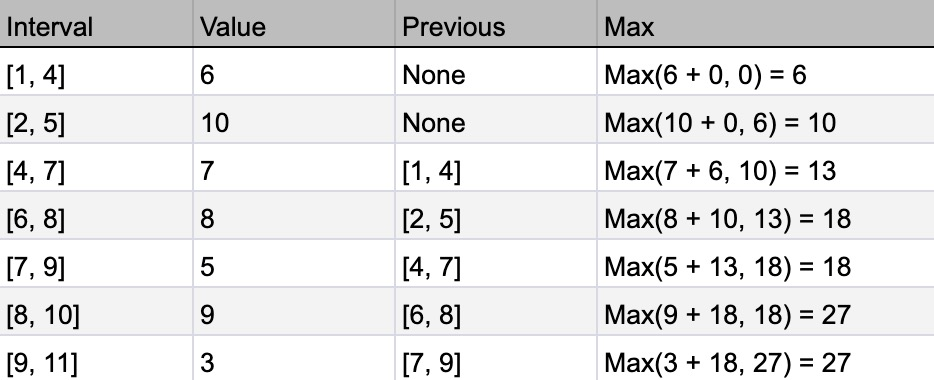

The "Trace(i)" column now indicates the decision taken at each step by referring to the previous intervals by their label. The "S" column is showing the set of intervals chosen so far, leading to the current maximum value.

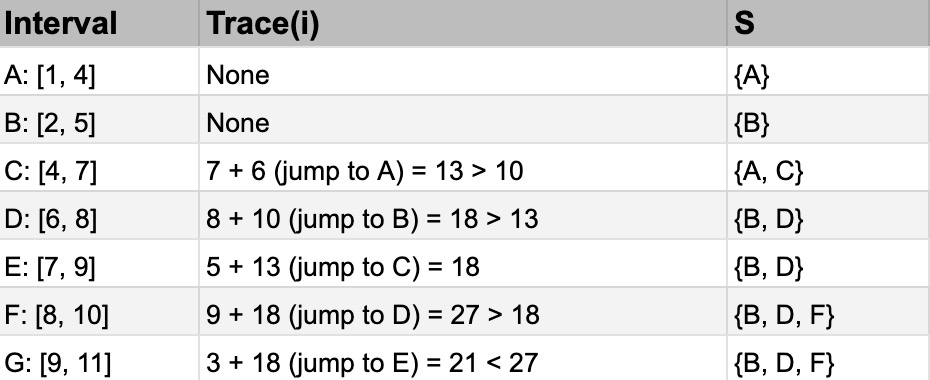

It can be seen from the table that the final set of intervals chosen is {B,D,F}, i.e., [2, 5], [6, 8], and [8, 10]. So the final answer is that the maximum combined value is 27 and the subset of non-overlapping intervals with this combined value is: [2, 5], [6, 8], and [8, 10].

Here's a runnable Python code for the problem using dynamic programming:

In [6]:
intervals = [(1, 4, 6), (2, 5, 10), (4, 7, 7), (6, 8, 8), (7, 9, 5), (8, 10, 9), (9, 11, 3)]

# Step 1: Sort the intervals by their end times
intervals.sort(key=lambda x: x[1])

def find_previous(i, intervals):
    for j in range(i-1, -1, -1):
        if intervals[j][1] <= intervals[i][0]:
            return j
    return -1

# Step 2: Compute the previous non-overlapping interval for each interval
previous = [find_previous(i, intervals) for i in range(len(intervals))]

# Step 3: Dynamic Programming
dp = [0] * (len(intervals) + 1)
for i in range(1, len(intervals) + 1):
    dp[i] = max(intervals[i-1][2] + (dp[previous[i-1] + 1] if previous[i-1] != -1 else 0), dp[i-1])

# Result
print(f"Maximum combined value: {dp[-1]}")

# (Optional) Trace back the chosen intervals
chosen_intervals = []
i = len(intervals)
while i > 0:
    if dp[i] != dp[i-1]:  # If the interval i-1 was chosen
        chosen_intervals.append(intervals[i-1])
        i = previous[i-1] + 1  # Jump to the previous non-overlapping interval
    else:
        i -= 1
chosen_intervals.reverse()
print(f"Chosen intervals: {chosen_intervals}")

Maximum combined value: 27
Chosen intervals: [(2, 5, 10), (6, 8, 8), (8, 10, 9)]


## **Reflection:**

1. How ChatGPT or the tool you used assisted in this task?

* In this assignment, it was clear that there were significantly more parts involving algorithms and code compared to the first time. I still primarily chatgpt to explore the algorithms in a variety of different usage scenarios.

* Designing algorithmic problems was much more extensive this time, and I spent a great deal of time learning and coding algorithms, and chatgpt played a crucial role in this: helping me to quickly make sense of a new piece of knowledge and dabble in it. Often I would ask chatgpt to explain an algorithm in detail, step by step, so that it was easier for me to understand the algorithm thoroughly and learn how to write the code step by step.

* In addition, I also use chatgpt to explain code in algorithms that I don't understand, which helps me to better utilize, memorize, and understand the code.
2. Challenges you faced while ensuring the problem maintained the spirit of the example

* The first challenge I encountered was the balance of complexity: designing a problem that was neither too simple nor too difficult was far more challenging than I had imagined. I wanted to design a problem that was complex enough to examine the nature of Kruskal algorithm, dynamic programming, Breadth-First Search, Prim's algorithm, etc. I wanted a problem that was thought-provoking, but not too challenging. It should provide a deeper understanding of these algorithms, but be so challenging that it cannot be solved in a reasonable amount of time.

* The second challenge I encountered was to achieve a clear problem statement: drafting a clear, concise, and unambiguous problem statement can be more difficult than it sounds. Especially in proof problems that use induction, I have to make sure that the descriptions are objective and correct.

* The third challenge I encountered was to ensure that all edge cases were covered and that multiple solutions were provided: sometimes there can be multiple valid solutions to a problem, each of which has its advantages and disadvantages. It can be challenging to anticipate and address these in a problem statement or assessment criteria. For some specific topics, in order to avoid ambiguity, I explicitly standardized which method to use to solve the problem, thus achieving the effect of examining that algorithm
3. What you learned about problem design in the realm of algorithms

* In this assignment, I have gained a deeper knowledge of algorithms such as Kruskal algorithm, topological sort, Master Theorem, dynamic programming, Breadth-First Search, Prim's algorithm, and I have an idea of their I also got a better understanding of their common usage scenarios and what kind of algorithms can be used to solve these problems.

* When providing answers to algorithmic problems, I was able to disassemble all the algorithmic steps little by little by hand, which enabled me to memorize the above algorithms more deeply. I tried to write pseudo-code in almost all of the answers, which I had never done before in learning algorithms, but I did it this time, which gave me a more practical feel of the algorithmic ideas in the concrete implementation of the code.

* I also summarized the multiple solution algorithms for a problem and the different application scenarios of the same algorithm, which consolidated my knowledge of algorithms in a more profound way.

## **Reference:**
* https://www.geeksforgeeks.org/kruskals-minimum-spanning-tree-algorithm-greedy-algo-2/
* https://www.hackerearth.com/practice/algorithms/graphs/topological-sort/tutorial/
* https://www.programiz.com/dsa/master-theorem
* https://www.spiceworks.com/tech/devops/articles/what-is-dynamic-programming/#:~:text=Dynamic%20programming%20is%20a%20computer,range%20of%20the%20algorithmic%20query
* https://gateoverflow.in/168546/does-unique-binary-tree-possible-binary-preorder-postorder


## **License:**
Copyright <2023> < Yanyan Chen >

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the “Software”), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED “AS IS”, WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.